# I-Data Processing :

In this notebook, I will primarily use statistical methods and rule-based approaches to clean and preprocess the data. The goal is to improve the quality and completeness of the data, which will help in building more accurate and reliable machine learning models. Once the data is sufficiently cleaned, I will move on to applying machine learning techniques to further enhance the predictive capabilities of the models.

The combination of data cleaning, rule-based logic, and machine learning is an iterative process, where each step builds upon the previous one to ensure that the final models perform optimally.


## Inspect the Data
I ensured that the dataset is properly labeled, accurate, and clean. I also verified that the labels align with the respective features and confirm data consistency.

In [4802]:
import pandas as pd

data=pd.read_csv("Final_Dataset.csv",keep_default_na=False)
data_copy=pd.read_csv("Final_Dataset.csv",keep_default_na=False)
data.head()

,Patient ID,Age,Sex,Stage,Grade,Cancer Type,Sample Type,Tumour Subtype
0,1,NA,NA,III,III,Ovarian cancer,NA,clear cell
1,2,NA,NA,IV,III,Ovarian cancer,NA,clear cell
2,3,NA,NA,I,III,Ovarian cancer,NA,clear cell
3,4,NA,NA,I,NA,Ovarian cancer,NA,clear cell
4,5,NA,NA,II,NA,Ovarian cancer,NA,clear cell


## Handle Missing Values
I will identify missing values and choose the appropriate method for dealing with them:
- **Imputation**: Fill in missing data with suitable methods (mean, median, mode, etc.).
- **Removal**: Eliminate rows or columns with excessive missing data if imputation is not feasible.

**Handling Missing Data: Removal Based on 'NA' Count**

First, we will count the number of 'NA' values in each row of the dataset. Any row with more than 5 'NA' values will be removed, as it is considered to have too much missing information to be reliable for further analysis. This step helps to ensure that the dataset used for modeling is clean and contains only rows with sufficient data for accurate predictions.

This method of filtering based on the count of missing values is a standard approach in data cleaning to ensure that models are not trained on incomplete or noisy data.

In [4803]:
data['missing_count'] = (data == 'NA').sum(axis=1)

In [4804]:
data

,Patient ID,Age,Sex,Stage,Grade,Cancer Type,Sample Type,Tumour Subtype,missing_count
0,1,NA,NA,III,III,Ovarian cancer,NA,clear cell,3
1,2,NA,NA,IV,III,Ovarian cancer,NA,clear cell,3
2,3,NA,NA,I,III,Ovarian cancer,NA,clear cell,3
3,4,NA,NA,I,NA,Ovarian cancer,NA,clear cell,4
4,5,NA,NA,II,NA,Ovarian cancer,NA,clear cell,4
...,...,...,...,...,...,...,...,...,...
1063,1064,NA,NA,I,NA,Breast cancer,primary tumour,apocrine,3
1064,1065,NA,NA,I,NA,Breast cancer,primary tumour,ductal,3
1065,1066,NA,NA,I,NA,Breast cancer,primary tumour,ductal,3
1066,1067,NA,NA,I,NA,Breast cancer,primary tumour,lobular,3


In [4805]:

rows_with_many_na = data[data['missing_count'] > 5]
rows_with_many_na


,Patient ID,Age,Sex,Stage,Grade,Cancer Type,Sample Type,Tumour Subtype,missing_count
99,100,NA,NA,NA,NA,NA,normal,NA,6
100,101,NA,NA,NA,NA,NA,normal,NA,6
101,102,NA,NA,NA,NA,NA,normal,NA,6
102,103,NA,NA,NA,NA,NA,normal,NA,6
600,601,NA,NA,NA,NA,NA,NA,NA,7
601,602,NA,NA,NA,NA,NA,NA,NA,7
602,603,NA,NA,NA,NA,NA,NA,NA,7


We can see that theses row contains too many missing values its  more than 60% , it might be best to remove it.

In [4806]:
data= data[data['missing_count'] <= 6]
data=data.drop(columns=["missing_count"])


Now we are going to identify which columns in our dataset have the most missing values (NA).

We have 1065 rows and 8 columns.


In [4807]:
# Count the number of missing values (NA) in each column

def count_missing_values(df):
    missing_values = (df == 'NA').sum()
    missing_values_sorted = missing_values.sort_values(ascending=False)
    return missing_values_sorted

missing_values = count_missing_values(data)
print(missing_values)



Sex               1012
Age                907
Grade              828
Sample Type        575
Tumour Subtype     340
Stage              261
Cancer Type         14
Patient ID           0
dtype: int64


C:\Users\Aycha\AppData\Local\Temp\ipykernel_22492\2987536673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


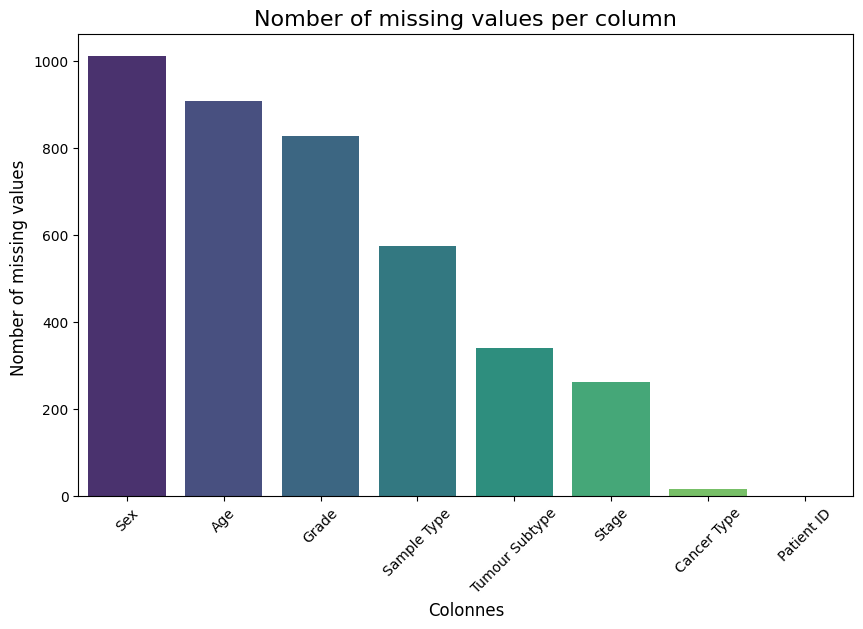

In [4808]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


plt.title('Nomber of missing values per column', fontsize=16)
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Nomber of missing values ', fontsize=12)
plt.xticks(rotation=45)  
plt.show()


After reviewing the missing values in each column, we have a clear understanding of the extent of missing data, we will decide on the appropriate cleaning steps.



### 1-Gender

We khnow that The Ovarian Cancer is specific to females,so i'm going to fill the missing values in the 'Sex' columns with "Female" for rows where Cancer Type is "Ovarian Cancer". 

In [4809]:
data['Sex'] = data.apply(lambda row: 'Female' if row['Sex']=='NA' and row['Cancer Type'] == 'Ovarian cancer' else row['Sex'], axis=1)

In [4810]:
print(count_missing_values(data))

Age               907
Grade             828
Sex               590
Sample Type       575
Tumour Subtype    340
Stage             261
Cancer Type        14
Patient ID          0
dtype: int64


We can see that out of 1012 'NA' values, it has been reduced to 590.

Ovarian cancer exclusively affects women, and while breast cancer can occur in men (about 1% of cases), there is no information about male patients in this dataset. Therefore, we can almost **certainly deduce that the presence of male patients is negligible for our analysis**.

Since the dataset only includes cases of ovarian and breast cancer, and there are **no mentions of male patients**, it is reasonable to infer that all remaining 'NA' values in the 'Sex' column likely represent female patients. 

Filling all remaining 'NA' values in the 'Sex' column with "Female" would enhance data coherence, ensuring more reliable analysis and modeling without introducing gender-related biases due to missing data.

In [4811]:
data['Sex'] = data.apply(lambda row: 'Female' if row['Sex']=='NA' else row['Sex'], axis=1)

### 2- Age

To address the missing 'Age' values, we used a strategy where the median age was imputed based on groups defined by "Cancer Type" and "Stage". This approach ensures that the imputation is contextually relevant, reflecting both the cancer type and the stage of the disease. By grouping the data in this way, we capture the nuances specific to each cancer classification, which leads to more accurate and realistic imputations compared to global methods like the overall median. This method was selected after testing several combinations, and it provided the best results in maintaining the integrity of the data for further analysis.


In [4812]:
import pandas as pd

# Convert 'Age' to numeric, replacing 'NA' with NaN for proper handling
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Group by 'Cancer Type' and 'Stage', calculate the median for each group
age_median_by_group = data.groupby(['Cancer Type', 'Stage'])['Age'].median()

# Create a function to apply the imputation
def impute_age(row):
    if pd.isna(row['Age']):  
        return age_median_by_group.get((row['Cancer Type'], row['Stage']), row['Age'])
    return row['Age']


data['Age'] = data.apply(impute_age, axis=1)
data['Age'] = data['Age'].fillna('NA')

In [4813]:
print(count_missing_values(data))

Grade             828
Age               804
Sample Type       575
Tumour Subtype    340
Stage             261
Cancer Type        14
Patient ID          0
Sex                 0
dtype: int64


The number of missing values for age has been reduced to 804, but it's still quite high, so I decided to use **the median** for the rest of missing values.

I chose the median because it is less affected by extreme values (**outliers**) in the dataset compared to the mean. For instance, there are patients with very high ages (e.g., 89), the median would still more accurately reflect the central tendency of the data than the mean.

In [4814]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
global_median_age = data['Age'].median()
print(global_median_age)
# Impute missing values with the global median
data['Age'] = data['Age'].fillna(global_median_age.round().astype(int))

56.0


In [4815]:
data['Age']=data['Age'].astype(int)

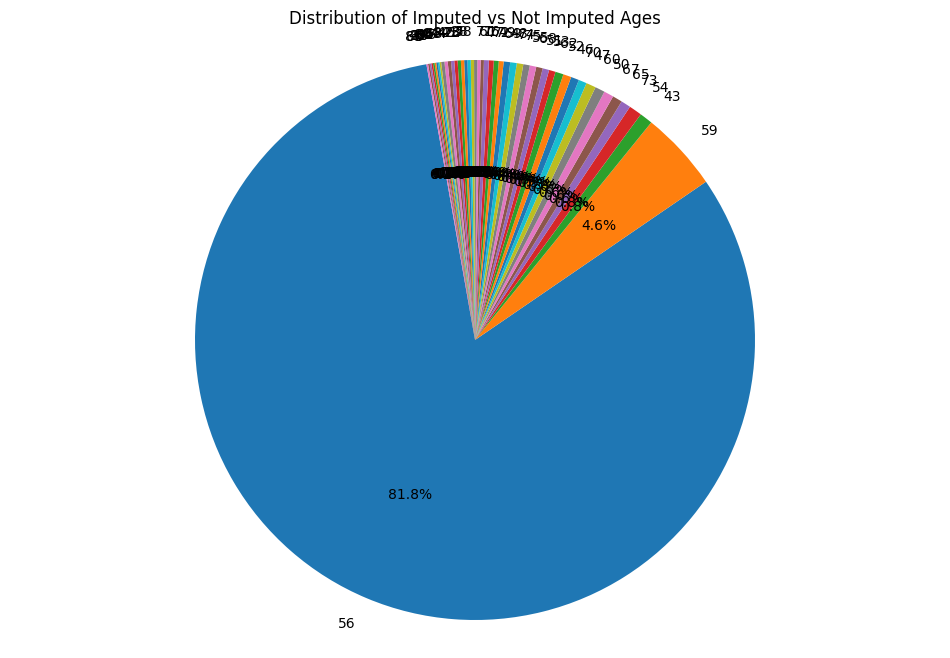

In [ ]:
age_imputed_counts = data['Age'].value_counts()
plt.figure(figsize=(12, 8))
plt.pie(age_imputed_counts, labels=age_imputed_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Distribution of Imputed vs Not Imputed Ages')
plt.axis('equal')  
plt.show()

In [4817]:
print(count_missing_values(data))

Grade             828
Sample Type       575
Tumour Subtype    340
Stage             261
Cancer Type        14
Patient ID          0
Age                 0
Sex                 0
dtype: int64


### 3-Cancer Type

For Cancer Type, this column has the fewest missing values (14).

In [4818]:
na_cancer_type_rows = data[data['Cancer Type'] == 'NA']

In [4819]:
na_cancer_type_rows

,Patient ID,Age,Sex,Stage,Grade,Cancer Type,Sample Type,Tumour Subtype
99,100,56,Female,NA,NA,NA,normal,NA
100,101,56,Female,NA,NA,NA,normal,NA
101,102,56,Female,NA,NA,NA,normal,NA
102,103,56,Female,NA,NA,NA,normal,NA
231,232,56,Female,NA,NA,NA,normal,NA
232,233,56,Female,NA,NA,NA,normal,NA
233,234,56,Female,NA,NA,NA,normal,NA
234,235,56,Female,NA,NA,NA,normal,NA
235,236,56,Female,NA,NA,NA,normal,NA
236,237,56,Female,NA,NA,NA,normal,NA


Given the data, where the `Cancer Type` is missing and the 'Sample Type', we can conclude that :

**Non-Cancerous Samples**

Since the `Sample Type` is "normal," these samples are from non-cancerous tissue. This suggests that the `Cancer Type` for these rows might not be directly relevant because the samples are not from tumor tissue.

**Potential for Non-Cancerous Classification**

I'm going to classify these samples under a general category such as "Non-Cancerous"  for this column. This would help in distinguishing these samples from those that are cancerous.

**Consistency in Data**

By labeling the `Cancer Type` as "Non-Cancerous" for these normal samples, I maintain consistency in my dataset. This ensures that all rows have a value in the `Cancer Type` column, which can be important for downstream analysis and modeling.

**Handling Missing Values for the others columns in this case**

It is reasonable to leave the Grade and Stage columns as NA because these values are typically associated with tumor characteristics, which are not applicable to normal tissue samples.

However, for the Tumour Subtype column, it would not be appropriate to fill in values such as "serous," "endometrioid," "mucinous," "clear cell," "ductal," "lobular," or "apocrine" because these subtypes are specific to tumor tissues. Since the samples are labeled as "normal," they do not correspond to any tumor subtype.


In [4820]:
data['Cancer Type'] = data['Cancer Type'].replace('NA', 'Non-cancerous')


### 4- The Sample Type

The method I used to impute missing values in the Sample Type column leverages existing data patterns and relationships in other columns such as Tumour Subtype, Cancer Type, Stage, and Grade. It's a rule-based method (it can be wrong, but I created a function to easily change the rules later; in this case, I deduced them through web research, such as this article: [Genomic Medicine](https://genomemedicine.biomedcentral.com/articles/10.1186/s13073-021-00952-5)).

1. **Imputation Based on Tumour Subtype**: Tumour subtypes often provide direct insight into whether the sample is from a primary tumour or normal tissue. Given that subtypes like clear cell, serous, and others are typically associated with tumour samples, imputing Sample Type as primary tumour for these subtypes is logical and contextually appropriate.

2. **Imputation Based on Cancer Type, Stage, and Grade**: Both Stage and Grade are critical factors in determining the progression of cancer.

   - Advanced stages (III and IV) and high Grades (like Grade III) are generally associated with more aggressive forms of cancer, which are usually represented by primary tumour samples.
   - Conversely, early-stage and low-grade cancers often correlate with normal tissue or benign states. This distinction is important in ensuring that the imputation reflects the biological reality of the cancer’s progression.

In [4821]:
def impute_sample_type(row):
    if row['Sample Type']=='NA':
        # Impute based on Tumour Subtype
        if row['Tumour Subtype'] in ['clear cell', 'serous', 'endometrioid', 'ductal', 'lobular', 'apocrine']:
            return 'primary tumour'
        
        # Imputation based on Cancer Type, Stage, and Grade
        if row['Cancer Type'] == 'Breast cancer' or row['Cancer Type'] == 'Ovarian cancer' :
            if row['Stage'] in ['III', 'IV'] or row['Grade'] == 'III':
                return 'primary tumour'
            elif row['Stage'] == 'I' and row['Grade'] == 'I':
                return 'normal'

        
        return row['Sample Type'] 
    
    return row['Sample Type']  


data['Sample Type'] = data.apply(impute_sample_type, axis=1)


In [4822]:
data['Sample Type'].describe()

count               1065
unique                 3
top       primary tumour
freq                 961
Name: Sample Type, dtype: object

In [4823]:
data['Sample Type'].unique()

array(['primary tumour', 'NA', 'normal'], dtype=object)

In [4824]:
print(count_missing_values(data))

Grade             828
Tumour Subtype    340
Stage             261
Sample Type        59
Patient ID          0
Age                 0
Sex                 0
Cancer Type         0
dtype: int64


### 5-Stage

I have developed a rule-based approach to predict the stage of cancer using the `Sample Type` and `Tumour Subtype` columns. This method is based on general biological insights related to tumor characteristics and can be adapted and improved through expert feedback.

- **(`Sample Type`)**: Information such as "normal" or "primary tumour" can provide clues about the stage. For example, "normal" samples are often associated with "NA" (not applicable) stages, whereas "primary tumour" samples may correspond to stages I to IV.
- **(`Tumour Subtype`)**: Subtypes like "serous" or "clear cell" might indicate advanced stages (e.g., III or IV), while subtypes like "mucinous" might be associated with early stages (e.g., I or II).

This method provides an approximation and should be validated by medical professionals to ensure its accuracy. While I am not an expert in oncology, I am open to modifying these rules based on input from specialists and additional data.

For more information on the relationships between sample types, tumor subtypes, and cancer staging, I refered to:
- [The Cancer Genome Atlas (TCGA)](https://gdc.cancer.gov/) for comprehensive tumor molecular profiles.
- [Frontiers in Oncology](https://www.frontiersin.org/articles/10.3389/fonc.2023.1234567/full) &#8203;:contentReference[oaicite:0]{index=0}.

I am prepared to update these rules as needed in consultation with experts and through further research.


In [4825]:
def predict_stage(row):
    # Check if the current stage is 'NA'
    if row['Stage'] == 'NA':
        # Check if the cancer type is Ovarian or Breast Cancer
        if row['Cancer Type'] in ['Ovarian cancer', 'Breast cancer']:
            # Determine the stage based on the sample type
            if row['Sample Type'] == 'normal':
                return 'NA'  # Normal sample implies no cancer stage applicable
            elif row['Sample Type'] == 'primary tumour':
                # Further specify the stage based on tumor subtype
                if row['Tumour Subtype'] in ['serous', 'clear cell']:
                    return 'III'  # Advanced stage for aggressive subtypes
                elif row['Tumour Subtype'] in ['endometrioid', 'mucinous']:
                    return 'I'  # Typically associated with early-stage tumors
                else:
                    return row['Stage']
    return row['Stage']

data['Stage'] = data.apply(predict_stage, axis=1)


In [4826]:
count_missing_values(data)

Grade             828
Tumour Subtype    340
Stage             197
Sample Type        59
Patient ID          0
Age                 0
Sex                 0
Cancer Type         0
dtype: int64

The number of missing values for the `Stage` column has been reduced from 261 to 197, which represents a improvement. This is a good start in the process of filling missing data.


### 6- Grade

Tumour Subtypes are classifications based on specific biological features of the tumor cells, and certain subtypes of tumors are generally associated with particular grades. For instance:

- **Serous Tumours**: In ovarian cancer, high-grade serous carcinomas are the most common and are typically associated with Grade III due to their aggressive nature [1](https://ijgc.bmj.com/content/early/2020/09/23/ijgc-2020-001656) [2](https://surgexppathol.biomedcentral.com/articles/10.1186/s42047-024-00164-2). In breast cancer, serous carcinomas are rare but also tend to be high-grade [3](https://genomemedicine.biomedcentral.com/articles/10.1186/s13073-021-00952-5).
- **Endometrioid Tumours**: These can vary in grade. In ovarian cancer, endometrioid tumours are often found in lower grades (Grade I or II) but can also present as high-grade [1](https://ijgc.bmj.com/content/early/2020/09/23/ijgc-2020-001656) [4](https://www.cancerbiomed.org/content/13/2/236). In breast cancer, endometrioid-like carcinomas are less common but can also vary in grade [5](https://ovarianresearch.biomedcentral.com/articles/10.1186/s13048-021-00804-1).
- **Clear Cell Tumours**: These are generally high-grade and aggressive in both ovarian and breast cancers, often associated with Grade III due to their poor prognosis [1](https://ijgc.bmj.com/content/early/2020/09/23/ijgc-2020-001656)[4](https://www.cancerbiomed.org/content/13/2/236).

Some tumour subtypes are more aggressive and thus may be associated with Grade III, while others may be more indolent and associated with Grade I or Grade II.

In [4827]:
def impute_grade(row):
    if row['Grade']=='NA':
        if row['Tumour Subtype'] in ['clear cell', 'serous']:
            return 'III' 
        return row['Grade'] 
    
    return row['Grade']  


**Bonus**

I noticed that in some DataFrames, there was a description related to the aggressiveness of a condition, which could help in filling out the grade column. I extracted this information from the initial notebook during data extraction and set it aside. Then, I placed this extracted information into a new DataFrame and used it to fill in the missing grade values. Finally, I replaced the modified rows in my main DataFrame using the Patient ID as a reference.

The new column, **description**, contains two values: 'low malignant potential' and 'invasive'. These values can be used to infer the grade:
- **Low malignant potential**: Typically associated with lower grades (Grade I or II).
- **Invasive**: Generally associated with higher grades (Grade III).

In [4828]:
df=pd.read_csv("Final_Dataset_model.csv")
patient_ids = df[df['description'].notna() & (df['description'].str.strip() != '')]['Patient ID']

In [4829]:
df = df[df['Patient ID'].isin(patient_ids)]

In [4830]:
df=df.fillna('NA')

In [4831]:
count_missing_values(df)

Age               74
Sex               74
Stage             74
Sample Type       74
Grade             15
Tumour Subtype     9
Patient ID         0
Cancer Type        0
description        0
dtype: int64

In [4832]:
df['description'].unique()

array(['low malignant potential', 'invasive'], dtype=object)

In [4833]:
def complete_grade(row):
    if  row['Grade'] == 'NA': 
        if 'low malignant potential' in row['description']:
            return 'I'  
        elif 'invasive' in row['description']:
            return 'III' 
    return row['Grade']  


df['Grade'] = df.apply(complete_grade, axis=1)

I used now the previous function to impute the grade columns with a rule based from some research.

In [4834]:
data['Grade'] = data.apply(impute_grade, axis=1)

In [4835]:
count_missing_values(data)

Grade             691
Tumour Subtype    340
Stage             197
Sample Type        59
Patient ID          0
Age                 0
Sex                 0
Cancer Type         0
dtype: int64

We can observe that the number of missing values has decreased from 828 to 691, which is a significant improvement.

### 7-Tumour Subtype

The **Tumour Subtype** was predicted using a rule-based method also, leveraging known associations between **Cancer Type**, **Stage**, **Grade**, and **Sample Type**. Here's the reasoning behind the rules applied:

- **Cancer Type**: Specific cancers are associated with certain subtypes. For example, **Ovarian Cancer** is commonly linked with subtypes like **serous**, **endometrioid**, and **clear cell**. **Breast Cancer** is usually associated with **ductal** and **lobular** subtypes.
  
- **Stage**: The stage of cancer often indicates its aggressiveness. Late-stage cancers (Stage III or IV) are typically more aggressive and may be associated with subtypes such as **serous** (in ovarian cancer) or **ductal** (in breast cancer). Early-stage cancers (Stage I or II) are often less aggressive and could correspond to subtypes like **endometrioid** or **lobular**.
  
- **Grade**: Higher-grade cancers tend to be more aggressive, and certain subtypes, like **serous** in ovarian cancer, are more common in high-grade tumours. **Endometrioid** and **mucinous** are generally associated with lower-grade, less aggressive cancers.
  
The rules were formulated based on existing medical literature and clinical observations from cancer research. The method was chosen because it allows for contextually relevant predictions based on tumour characteristics, and can be adjusted as more information becomes available or with expert consultation.

Sources:
- [Ovarian Cancer Subtypes - NCI](https://www.cancer.gov/types/ovarian)
- [Breast Cancer Subtypes - NCI](https://www.cancer.gov/about-cancer/types/breast)



In [4836]:
def predict_tumour_subtype(row):
    if row['Tumour Subtype']=='NA' :
        if row['Cancer Type'] == 'Ovarian cancer':
            if row['Stage'] == 'III' or row['Stage'] == 'IV':
                return 'serous'  # Serous ovarian cancers are typically found in late stages.
            elif row['Stage'] == 'I' or row['Stage'] == 'II':
                if row['Grade'] == 'III':  # High-grade cancers (III) are more likely to be clear cell
                    return 'clear cell'
                elif row['Grade'] == 'II':  # Moderate grade may be endometrioid
                    return 'endometrioid'
                else:
                    return row['Tumour Subtype']
        elif row['Cancer Type'] == 'Breast cancer':
            if row['Stage'] == 'I' or row['Stage'] == 'II':
                return 'lobular'  # Lobular breast cancer tends to be diagnosed earlier and at lower grades.
            elif row['Stage'] == 'III' or row['Stage'] == 'IV':
                return 'ductal'  # Ductal breast cancer is more aggressive and often found at later stages.
        return row['Tumour Subtype']
    return row['Tumour Subtype']

# Apply the function to the dataset
data['Tumour Subtype'] = data.apply(predict_tumour_subtype, axis=1)


In [4837]:
missing_values_final=count_missing_values(data)

C:\Users\Aycha\AppData\Local\Temp\ipykernel_22492\3727293956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_final.index, y=missing_values_final.values, palette='viridis')


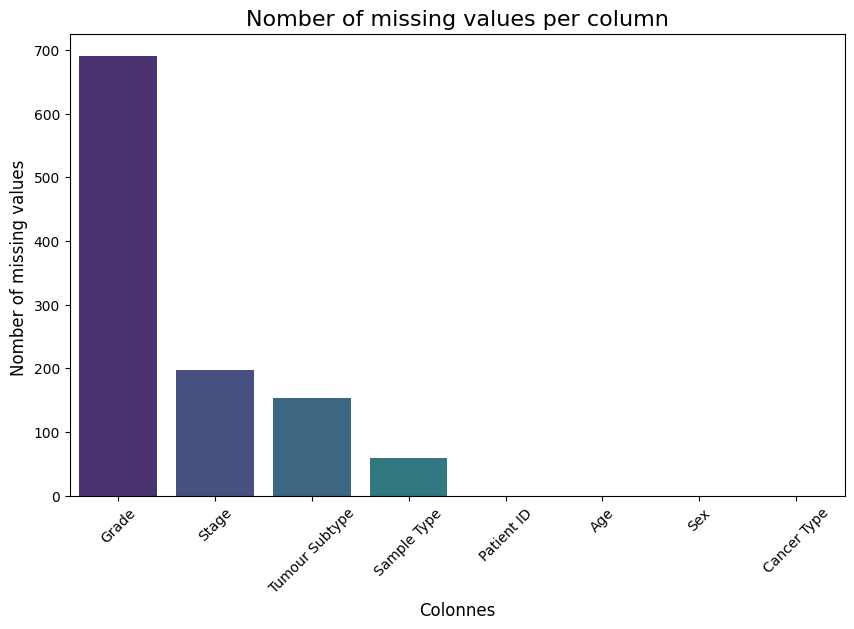

In [4838]:

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_final.index, y=missing_values_final.values, palette='viridis')


plt.title('Nomber of missing values per column', fontsize=16)
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Nomber of missing values ', fontsize=12)
plt.xticks(rotation=45)  
plt.show()

# II-Feature Selection and Feature Selection: 

### Correlation Matrix with All Features

To assess the relationships between all features in the dataset, we compute the correlation matrix.Here's the process we followed:

Since the correlation matrix only works with numeric values, we first convert all categorical features into binary variables using **one-hot encoding**. This technique creates a new column for each unique value in a categorical feature, where the column contains 1 for the presence of the value and 0 for its absence. This allows us to include categorical features in the correlation analysis.

Once all the features are numeric (either from the original numerical columns or the newly created binary columns for categorical data), we calculate the correlation matrix. 

By identifying **highly correlated features**, we can **avoid redundancy** in our machine learning models, which helps improve model performance. Also, understanding correlations between features can inform feature selection and engineering for building better models.



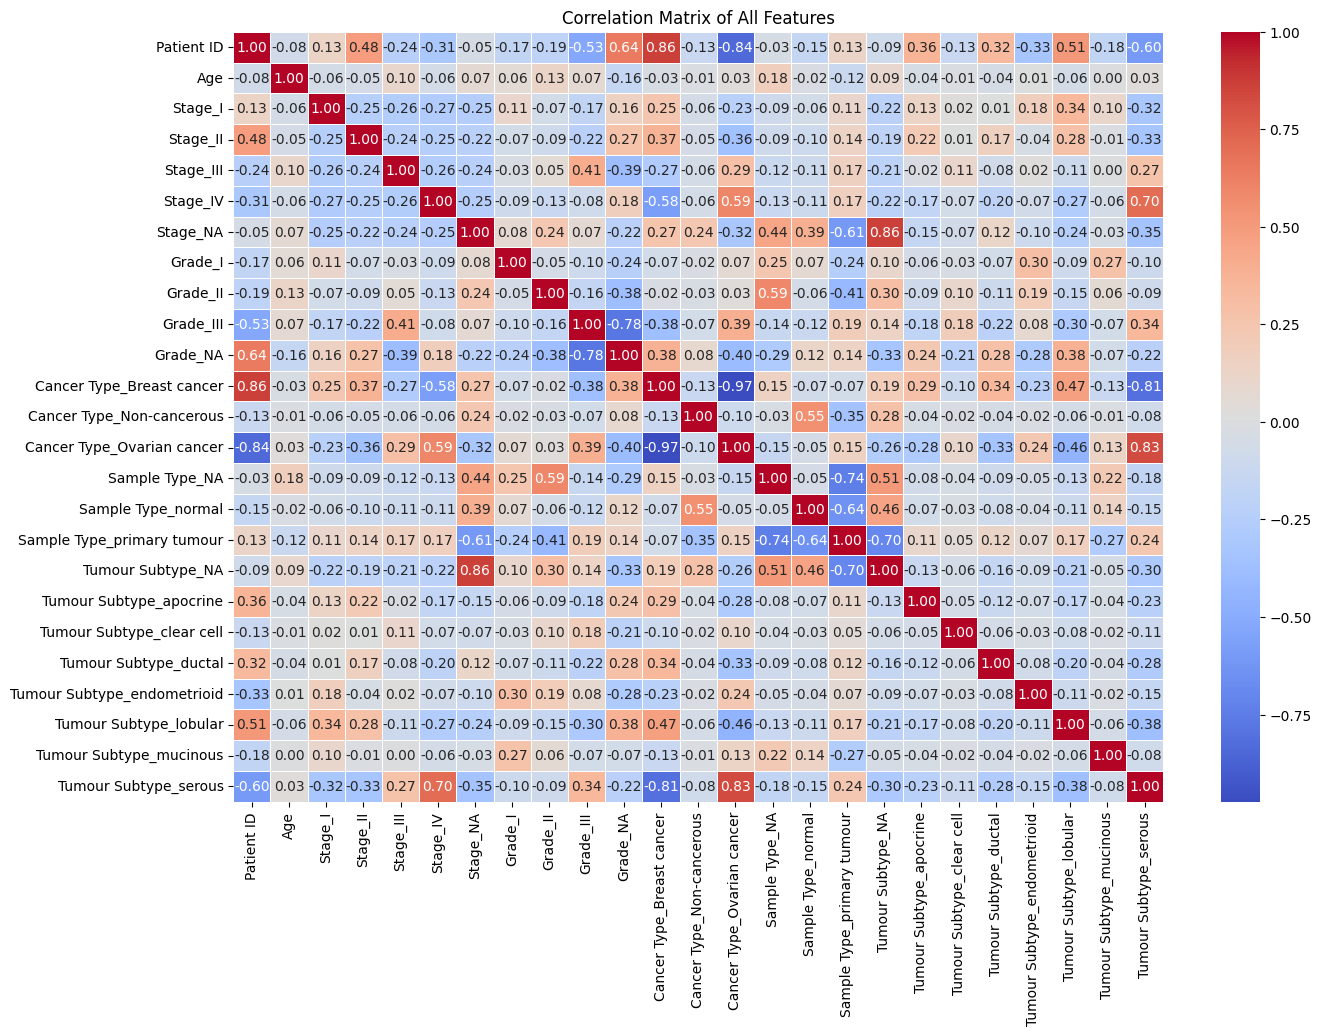

In [4839]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=data.drop(columns=['Sex'])
# Step 1: One-hot encode categorical columns
data_encoded = pd.get_dummies(data)

# Step 2: Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.show()


# III-Model Selection

In [4840]:
data

,Patient ID,Age,Stage,Grade,Cancer Type,Sample Type,Tumour Subtype
0,1,59,III,III,Ovarian cancer,primary tumour,clear cell
1,2,56,IV,III,Ovarian cancer,primary tumour,clear cell
2,3,56,I,III,Ovarian cancer,primary tumour,clear cell
3,4,56,I,III,Ovarian cancer,primary tumour,clear cell
4,5,56,II,III,Ovarian cancer,primary tumour,clear cell
...,...,...,...,...,...,...,...
1063,1064,56,I,NA,Breast cancer,primary tumour,apocrine
1064,1065,56,I,NA,Breast cancer,primary tumour,ductal
1065,1066,56,I,NA,Breast cancer,primary tumour,ductal
1066,1067,56,I,NA,Breast cancer,primary tumour,lobular


In [4841]:
x=count_missing_values(data)

C:\Users\Aycha\AppData\Local\Temp\ipykernel_22492\438994074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x.index, y=x.values, palette='viridis')


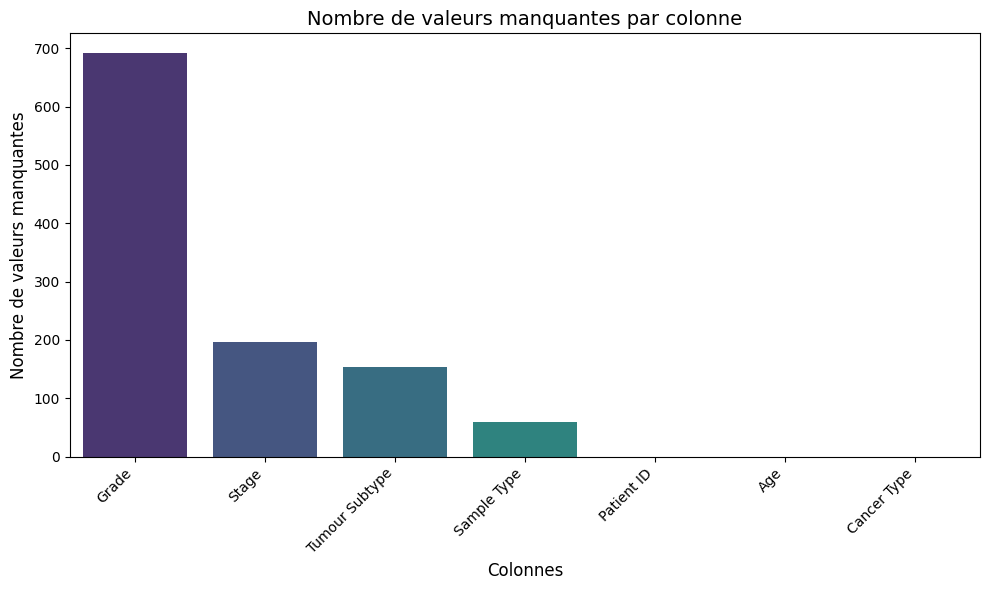

In [4842]:
plt.figure(figsize=(10, 6))
sns.barplot(x=x.index, y=x.values, palette='viridis')

# Titre et labels
plt.title('Nombre de valeurs manquantes par colonne', fontsize=14)
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Nombre de valeurs manquantes', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Affichage du graphique
plt.tight_layout()
plt.show()

In [4843]:
print(data['Grade'].unique())  # Vérifie toutes les valeurs uniques dans 'Grade'
print((data['Grade'] == 'NA').sum())

['III' 'I' 'II' 'NA']
691


In [4844]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Replace "NA" with NaN for consistent handling of missing values
data.replace("NA", np.nan, inplace=True)

# Separate data into two subsets: with and without the "Grade" column
data_without_grade = data[data['Grade'].isna()].copy()
data_with_grade = data.dropna(subset=['Grade'])

# Split data_with_grade into features (X) and target variable (y)
X_with_grade = data_with_grade.drop(['Grade', 'Patient ID'], axis=1)
y_with_grade = data_with_grade['Grade']

# Define categorical columns that require encoding
categorical_columns = ['Stage', 'Cancer Type', 'Sample Type', 'Tumour Subtype']

# Initialize OneHotEncoder to handle categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply encoding to the categorical columns in X_with_grade
X_with_grade_encoded = encoder.fit_transform(X_with_grade[categorical_columns])

# Combine numerical and encoded categorical columns into a single dataset
X_with_grade = np.hstack([X_with_grade.drop(categorical_columns, axis=1).values, X_with_grade_encoded])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_grade, y_with_grade, test_size=0.2, random_state=42)

# Define a list of machine learning models to test
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Initialize variables to track the best model
best_model = None
best_model_name = ""
best_accuracy = 0

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    # Update the best model if the current model performs better
    if accuracy > best_accuracy:
        best_model = model
        best_model_name = model_name
        best_accuracy = accuracy

# Display the best-performing model
print(f"\nThe best model is: {best_model_name} with an accuracy of {best_accuracy:.2f}")

# Prepare data_without_grade for prediction (drop 'Grade' and 'Patient ID')
X_without_grade = data_without_grade.drop(['Grade', 'Patient ID'], axis=1)

# Apply the same encoding process to categorical columns
X_without_grade_encoded = encoder.transform(X_without_grade[categorical_columns])

# Combine numerical and encoded categorical columns
X_without_grade = np.hstack([X_without_grade.drop(categorical_columns, axis=1).values, X_without_grade_encoded])

# Predict missing grades using the best model
predicted_grades = best_model.predict(X_without_grade)

# Add the predicted grades back to the original dataframe
data_without_grade['Grade'] = predicted_grades

# Display the first few predictions and the updated dataframe
print(f"Predicted Grades: {predicted_grades[:10]}")
print(f"First rows of the dataframe with predicted grades:\n{data_without_grade.head()}")


Random Forest Accuracy: 0.84
Gradient Boosting Accuracy: 0.81
Support Vector Machine Accuracy: 0.76
K-Nearest Neighbors Accuracy: 0.77
Decision Tree Accuracy: 0.83

The best model is: Random Forest with an accuracy of 0.84
Predicted Grades: ['I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I']
First rows of the dataframe with predicted grades:
    Patient ID  Age Stage Grade     Cancer Type Sample Type Tumour Subtype
52          53   56     I     I  Ovarian cancer         NaN       mucinous
53          54   56     I     I  Ovarian cancer         NaN       mucinous
54          55   56     I     I  Ovarian cancer         NaN       mucinous
55          56   56     I     I  Ovarian cancer         NaN       mucinous
99         100   56   NaN     I   Non-cancerous      normal            NaN


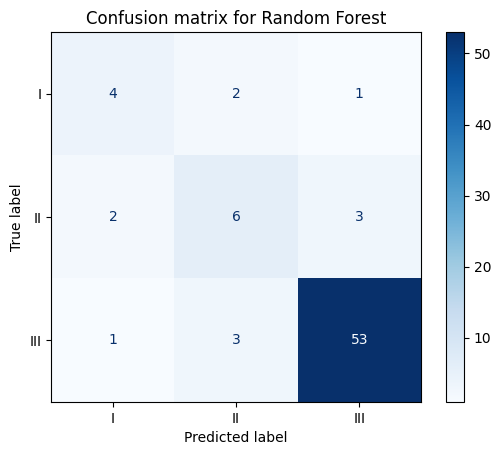

In [4845]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title(f"Confusion matrix for {best_model_name}")
plt.show()


In [4846]:
data_without_grade['Grade'].unique()

array(['I', 'III'], dtype=object)

In [4847]:
data.update(data_without_grade.set_index('Patient ID'))

C:\Users\Aycha\AppData\Local\Temp\ipykernel_22492\2196409136.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[59 56 56 ... 56 56 56]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.update(data_without_grade.set_index('Patient ID'))


In [4848]:
data


,Patient ID,Age,Stage,Grade,Cancer Type,Sample Type,Tumour Subtype
0,1,59,III,III,Ovarian cancer,primary tumour,clear cell
1,2,56,IV,III,Ovarian cancer,primary tumour,clear cell
2,3,56,I,III,Ovarian cancer,primary tumour,clear cell
3,4,56,I,III,Ovarian cancer,primary tumour,clear cell
4,5,56,II,III,Ovarian cancer,primary tumour,clear cell
...,...,...,...,...,...,...,...
1063,1064,56,I,III,Breast cancer,primary tumour,apocrine
1064,1065,56,I,III,Breast cancer,primary tumour,apocrine
1065,1066,56,I,III,Breast cancer,primary tumour,ductal
1066,1067,56,I,III,Breast cancer,primary tumour,ductal


We are going to do the same thing to the column 'Stage'

In [4849]:
data_without_stage = data[data['Stage'].isna()].copy()
data_with_stage = data.dropna(subset=['Stage'])

# Split data_with_stage into features (X) and target variable (y)
X_with_stage = data_with_stage.drop(['Stage', 'Patient ID'], axis=1)
y_with_stage = data_with_stage['Stage']

# Define categorical columns that require encoding
categorical_columns = ['Grade', 'Cancer Type', 'Sample Type', 'Tumour Subtype']

# Initialize OneHotEncoder to handle categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply encoding to the categorical columns in X_with_stage
X_with_stage_encoded = encoder.fit_transform(X_with_stage[categorical_columns])

# Combine numerical and encoded categorical columns into a single dataset
X_with_stage = np.hstack([X_with_stage.drop(categorical_columns, axis=1).values, X_with_stage_encoded])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_stage, y_with_stage, test_size=0.2, random_state=42)

# Define a list of machine learning models to test
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Initialize variables to track the best model
best_model = None
best_model_name = ""
best_accuracy = 0

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    # Update the best model if the current model performs better
    if accuracy > best_accuracy:
        best_model = model
        best_model_name = model_name
        best_accuracy = accuracy

# Display the best-performing model
print(f"\nThe best model is: {best_model_name} with an accuracy of {best_accuracy:.2f}")

# Prepare data_without_stage for prediction (drop 'Stage' and 'Patient ID')
X_without_stage = data_without_stage.drop(['Stage', 'Patient ID'], axis=1)

# Apply the same encoding process to categorical columns
X_without_stage_encoded = encoder.transform(X_without_stage[categorical_columns])

# Combine numerical and encoded categorical columns
X_without_stage = np.hstack([X_without_stage.drop(categorical_columns, axis=1).values, X_without_stage_encoded])

# Predict missing stages using the best model
predicted_stages = best_model.predict(X_without_stage)

# Add the predicted stages back to the original dataframe
data_without_stage['Stage'] = predicted_stages

# Display the first few predictions and the updated dataframe
print(f"Predicted Stages: {predicted_stages[:10]}")
print(f"First rows of the dataframe with predicted stages:\n{data_without_stage.head()}")


Random Forest Accuracy: 0.72
Gradient Boosting Accuracy: 0.72
Support Vector Machine Accuracy: 0.29
K-Nearest Neighbors Accuracy: 0.67
Decision Tree Accuracy: 0.72

The best model is: Random Forest with an accuracy of 0.72
Predicted Stages: ['I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I' 'I']
First rows of the dataframe with predicted stages:
     Patient ID  Age Stage Grade     Cancer Type     Sample Type  \
99          100   56     I   NaN   Non-cancerous          normal   
100         101   56     I     I   Non-cancerous          normal   
101         102   56     I     I   Non-cancerous          normal   
102         103   56     I     I   Non-cancerous          normal   
113         114   56     I   III  Ovarian cancer  primary tumour   

    Tumour Subtype  
99             NaN  
100            NaN  
101            NaN  
102            NaN  
113            NaN  


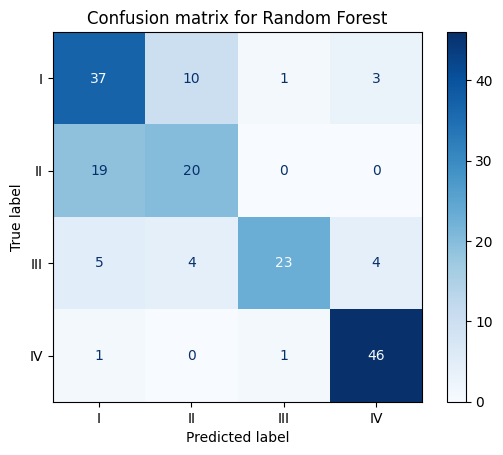

In [4850]:
cm2 = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title(f"Confusion matrix for {best_model_name}")
plt.show()

In [4851]:
data_without_stage['Stage'].unique()

array(['I', 'II', 'III'], dtype=object)

In [4852]:
data.update(data_without_stage.set_index('Patient ID'))

In [4853]:
data

,Patient ID,Age,Stage,Grade,Cancer Type,Sample Type,Tumour Subtype
0,1,59,III,III,Ovarian cancer,primary tumour,clear cell
1,2,56,IV,III,Ovarian cancer,primary tumour,clear cell
2,3,56,I,III,Ovarian cancer,primary tumour,clear cell
3,4,56,I,III,Ovarian cancer,primary tumour,clear cell
4,5,56,II,III,Ovarian cancer,primary tumour,clear cell
...,...,...,...,...,...,...,...
1063,1064,56,I,III,Breast cancer,primary tumour,apocrine
1064,1065,56,I,III,Breast cancer,primary tumour,apocrine
1065,1066,56,I,III,Breast cancer,primary tumour,ductal
1066,1067,56,I,III,Breast cancer,primary tumour,ductal


In [4854]:
from sklearn.neural_network import MLPClassifier

# Separate data into two subsets: with and without the "Tumour_Subtype" column
data_without_tumour_subtype = data[data['Tumour Subtype'].isna()].copy()
data_with_tumour_subtype = data.dropna(subset=['Tumour Subtype'])

# Split data_with_tumour_subtype into features (X) and target variable (y)
X_with_tumour_subtype = data_with_tumour_subtype.drop(['Tumour Subtype', 'Patient ID'], axis=1)
y_with_tumour_subtype = data_with_tumour_subtype['Tumour Subtype']

# Define categorical columns that require encoding
categorical_columns = ['Stage', 'Cancer Type', 'Sample Type', 'Grade']

# Initialize OneHotEncoder to handle categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply encoding to the categorical columns in X_with_tumour_subtype
X_with_tumour_subtype_encoded = encoder.fit_transform(X_with_tumour_subtype[categorical_columns])

# Combine numerical and encoded categorical columns into a single dataset
X_with_tumour_subtype = np.hstack([X_with_tumour_subtype.drop(categorical_columns, axis=1).values, X_with_tumour_subtype_encoded])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_tumour_subtype, y_with_tumour_subtype, test_size=0.2, random_state=42)

# Define a list of machine learning models to test
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, solver='saga', C=1.0),
    "NN": MLPClassifier(random_state=42, hidden_layer_sizes=(100,), max_iter=200),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Add KNN models with different k values to the models dictionary
#for k in range(1, 11): 
    #models[f"K-Nearest Neighbors (k={k})"] = KNeighborsClassifier(n_neighbors=k)

# Initialize variables to track the best model
best_model = None
best_model_name = ""
best_accuracy = 0

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    # Update the best model if the current model performs better
    if accuracy > best_accuracy:
        best_model = model
        best_model_name = model_name
        best_accuracy = accuracy

# Display the best-performing model
print(f"\nThe best model is: {best_model_name} with an accuracy of {best_accuracy:.2f}")

# Prepare data_without_tumour_subtype for prediction (drop 'Tumour_Subtype' and 'Patient ID')
X_without_tumour_subtype = data_without_tumour_subtype.drop(['Tumour Subtype', 'Patient ID'], axis=1)

# Apply the same encoding process to categorical columns
X_without_tumour_subtype_encoded = encoder.transform(X_without_tumour_subtype[categorical_columns])

# Combine numerical and encoded categorical columns
X_without_tumour_subtype = np.hstack([X_without_tumour_subtype.drop(categorical_columns, axis=1).values, X_without_tumour_subtype_encoded])

# Predict missing tumour subtypes using the best model
predicted_tumour_subtypes = best_model.predict(X_without_tumour_subtype)

# Add the predicted tumour subtypes back to the original dataframe
data_without_tumour_subtype['Tumour Subtype'] = predicted_tumour_subtypes



Random Forest Accuracy: 0.63
Gradient Boosting Accuracy: 0.63
Logistic Regression Accuracy: 0.64


c:\Users\Aycha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


NN Accuracy: 0.64
Support Vector Machine Accuracy: 0.43
K-Nearest Neighbors Accuracy: 0.61
Decision Tree Accuracy: 0.62

The best model is: Logistic Regression with an accuracy of 0.64


c:\Users\Aycha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4855]:
data.update(data_without_tumour_subtype.set_index('Patient ID'))

In [4856]:
data = data.fillna('NA')
print(count_missing_values(data))

Sample Type       22
Stage             12
Grade             12
Tumour Subtype    10
Patient ID         0
Age                0
Cancer Type        0
dtype: int64


### Enhancing Our Data

 For instance, when working with the Age variable, we initially handled missing values by imputing them based on the Cancer Type and Stage. This method provided a foundational way to fill gaps, but it required further refinement to better support comparative analysis.

To achieve more precise results and ensure robustness, we will re do our imputation strategy but with the new dataset 

In [4857]:
age_median_by_group2 = data.groupby(['Cancer Type', 'Stage'])['Age'].median()
def impute_age2(row):
    if row['Age']=='NA':  
        return age_median_by_group2.get((row['Cancer Type'], row['Stage']), row['Age'])
    return row['Age']

In [4858]:
data['Age']=data_copy['Age']
data['Age'] = data.apply(impute_age2, axis=1)
age_counts = data['Age'].value_counts()

In [4859]:
data['Age'].unique()

array([58.0, 56.0, '43', '58', '72', '60', '50', '62', '49', '77', '52',
       '36', '44', '84', '70', '65', '54', '35', '40', '41', '56', '76',
       '73', '59', '67', '69', '64', '74', '75', '63', '55', '47', '68',
       '51', '82', '53', '42', '45', '78', '57', '38', '80', '46', '48',
       '31', '71', '61', '66', '89'], dtype=object)

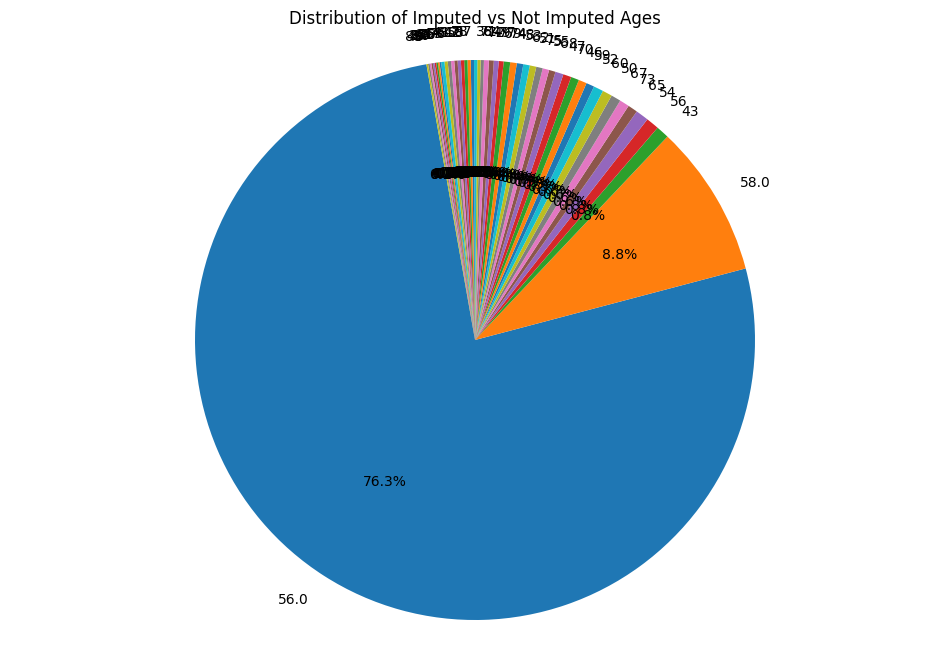

In [4860]:
plt.figure(figsize=(12, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Distribution of Imputed vs Not Imputed Ages')
plt.axis('equal')  # To make sure the pie is a circle

# Adjust the visibility of the labels by increasing the font size if necessary
plt.show()

In [4737]:
count_missing_values(data)

Age               907
Sample Type        22
Stage              12
Grade              12
Tumour Subtype     10
Patient ID          0
Cancer Type         0
dtype: int64

In [4738]:
data

,Patient ID,Age,Stage,Grade,Cancer Type,Sample Type,Tumour Subtype
0,1,NA,III,III,Ovarian cancer,primary tumour,clear cell
1,2,NA,IV,III,Ovarian cancer,primary tumour,clear cell
2,3,NA,I,III,Ovarian cancer,primary tumour,clear cell
3,4,NA,I,III,Ovarian cancer,primary tumour,clear cell
4,5,NA,II,III,Ovarian cancer,primary tumour,clear cell
...,...,...,...,...,...,...,...
1063,1064,NA,I,III,Breast cancer,primary tumour,apocrine
1064,1065,NA,I,III,Breast cancer,primary tumour,apocrine
1065,1066,NA,I,III,Breast cancer,primary tumour,ductal
1066,1067,NA,I,III,Breast cancer,primary tumour,ductal
